In [1]:
import pandas as pd

In [3]:
mnist=pd.read_csv("train.csv") 

In [5]:
mnist.shape

(42000, 785)

In [6]:
mnist.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
l=mnist['label']

In [8]:
l.shape

(42000,)

In [9]:
d=mnist.drop('label',axis=1)

In [10]:
d.shape

(42000, 784)

In [11]:
mnist.shape

(42000, 785)

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
plt.figure(figsize=(7,7))
type(d)

pandas.core.frame.DataFrame

<Figure size 504x504 with 0 Axes>

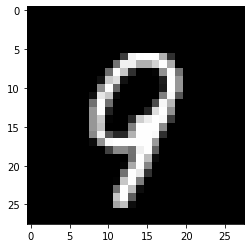

9

In [36]:
idx=180
pixels = d.loc[idx].to_numpy().reshape(28,28)                   #to_numpy function is used to convert d_f to numpy array
plt.imshow(pixels , interpolation=None ,cmap = "gray")
plt.show()
l[idx]

performing PCA (principle component analysis)

In [41]:
type(d)

pandas.core.frame.DataFrame

In [38]:
from sklearn.preprocessing import StandardScaler

In [42]:
standard_data=StandardScaler().fit_transform(d)         ###here the data frame is also converted into numpy array

In [43]:
sample_data=standard_data

In [44]:
### calculating covariance matrix

covariance_matrix = np.matmul(sample_data.T,sample_data)

In [45]:
#### now calculating eigh values using covariance matrix

from scipy.linalg import eigh

values,vector = eigh(covariance_matrix,eigvals=(782,783))

In [47]:
vector.shape

(784, 2)

In [48]:
vector = vector.T


In [51]:
new_data = np.matmul(vector,standard_data.T)

In [52]:
new_data.shape

(2, 42000)

In [54]:
final_mnist = np.vstack((new_data,l)).T

In [55]:
final_mnist.shape

(42000, 3)

In [56]:
type(final_mnist)

numpy.ndarray

In [58]:
#### converting the numpy data set to padas data frame as seaborn plots dataframe only

df = pd.DataFrame(data=final_mnist,columns=("first_dimension","second_dimension","label"))

In [59]:
df.head(5)

,first_dimension,second_dimension,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


In [60]:
import seaborn as sns



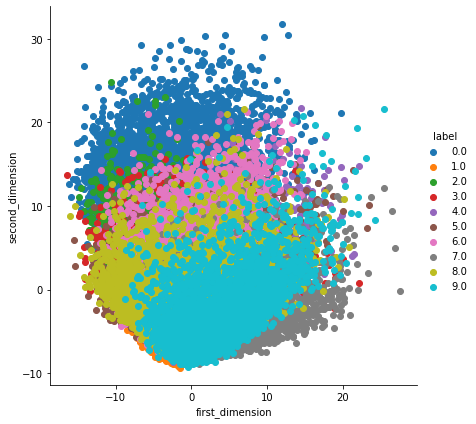

In [64]:
sns.FacetGrid( df , hue="label" , height=6).map(plt.scatter , "first_dimension" , "second_dimension" ).add_legend()
plt.show()

we could also use sklearn liberary to perform pca ,we dont have to calculate eigh values manually

In [65]:
from sklearn import decomposition

In [66]:
pca = decomposition.PCA()                      
pca.n_components=2

In [67]:
reduced_data = pca.fit_transform(sample_data)

In [68]:
reduced_data.shape

(42000, 2)

In [69]:
type(reduced_data)

numpy.ndarray

In [72]:
final_numpy_data = np.vstack((reduced_data.T,l)).T

In [73]:
final_numpy_data.shape

(42000, 3)

In [74]:
#### converting numpy to data frame

data_frame_2 = pd.DataFrame( data = final_numpy_data , columns=("principle1","principle2","label"))

In [75]:
data_frame_2.head(5)

,principle1,principle2,label
0,-5.140488,-5.226676,1.0
1,19.292296,6.032777,0.0
2,-7.644490,-1.705508,1.0
3,-0.474226,5.835899,4.0
4,26.559547,6.024725,0.0


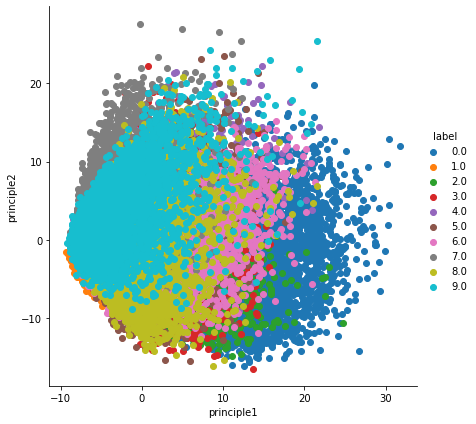

In [76]:
sns.FacetGrid(data_frame_2,hue = "label", height=6 ).map(plt.scatter , "principle1" , "principle2").add_legend()
plt.show()

2-d visualisation using t-SNE

In [77]:
from sklearn.manifold import TSNE

In [80]:
model = TSNE(n_components = 2, random_state = 2)    #### if an int is assigned to random state then multiple function calls generates similar patterns

In [79]:
tsne_data = model.fit_transform(standard_data)

In [82]:
tsne_data = np.vstack((tsne_data.T,l)).T

In [83]:
tsne_df = pd.DataFrame(data = tsne_data,columns = ( "column1" , "column2" , "labels" ) )

In [84]:
tsne_df.shape

(42000, 3)

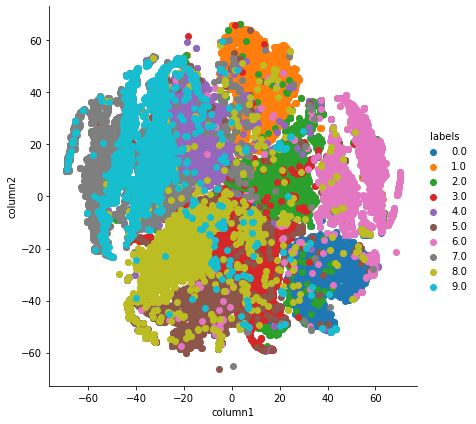

In [86]:
sns.FacetGrid( tsne_df , hue ="labels" , height = 6).map( plt.scatter ,"column1" , "column2").add_legend()
plt.show()